In [3]:
import numpy as np
from tqdm import tqdm
import netCDF4

In [4]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
import pygrib

In [5]:
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

In [7]:
ds = xr.open_dataset("c:/Users/jorda/Downloads/20160413/20160413_hrrr.t03z.wrfprsf00.grib2", filter_by_keys={'typeOfLevel' : 'isobaricInhPa'})
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

Ignoring index file 'c:/Users/jorda/Downloads/20160413/20160413_hrrr.t03z.wrfprsf00.grib2.923a8.idx' incompatible with GRIB file


In [8]:
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 40, x: 1799, y: 1059)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1.013e+03 1e+03 975.0 ... 75.0 50.0
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables: (12/14)
    gh             (isobaricInhPa, y, x) float32 ...
    t              (isobaricInhPa, y, x) float32 ...
    r              (isobaricInhPa, y, x) float32 ...
    dpt            (isobaricInhPa, y, x) float32 ...
    q              (isobaricInhPa, y, x) float32 ...
    w              (isobaricInhPa, y, x) float32 ...
    ...             ...
    absv           (isobaricInhPa, y, x) float32 ...
    clwmr          (isobaricInhPa, y, x) float32 ...
    cice           (isobaricInhPa, y, x) float32 ...
    rwmr           (isobaricInhPa, y, x) float32 ...
    snmr           (isobaricInhPa, y, x) float32 ...
    grle           (isobaricInhPa, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2021-06-24T19:26 GRIB to CDM+CF via cfgrib-0.9.9...

C:\Users\jorda\anaconda3\envs\hagelslag\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


C:\Users\jorda\anaconda3\envs\hagelslag\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


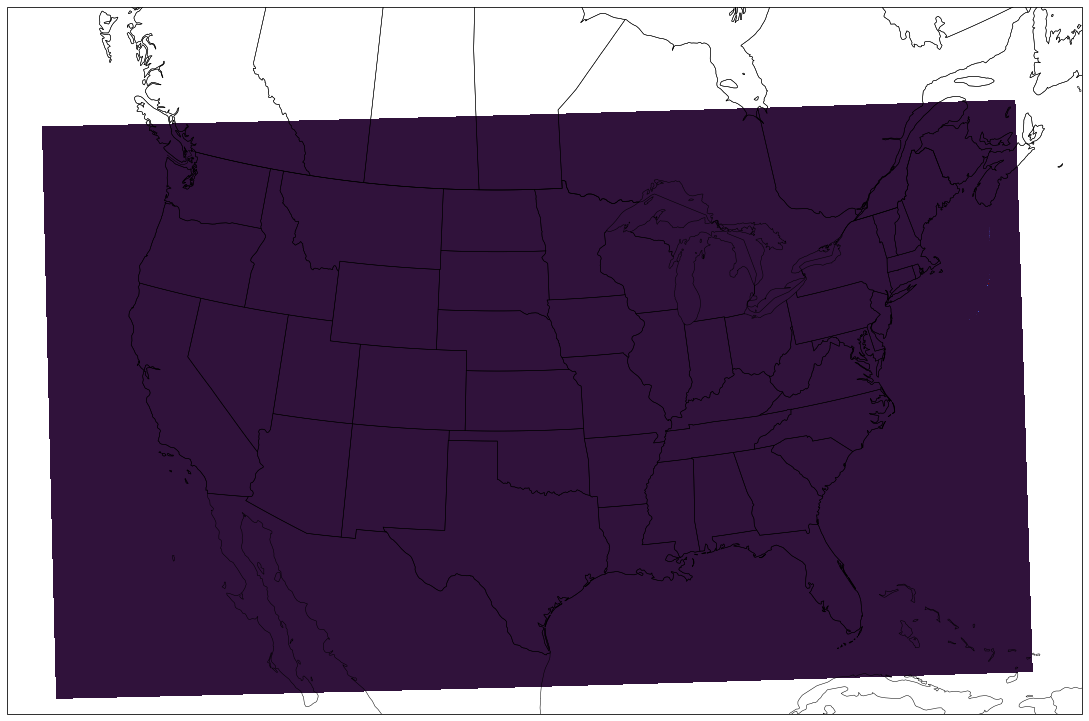

In [9]:
crs = ccrs.LambertConformal(central_longitude =-100, central_latitude=45)
#Createfigure

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 13), constrained_layout=True,
                          subplot_kw={'projection': crs})

ax.set_extent([235., 290., 20., 55.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)


    
ax.pcolormesh(ds.longitude,ds.latitude,ds.grle.values[0],vmin=0,cmap='turbo',transform=ccrs.PlateCarree())